In [1]:
%pip install geopandas seaborn pandana folium matplotlib mapclassify osmnx fiona pyogrio --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import packets
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import osmnx as ox
import seaborn as sns
import numpy as np
from scipy.spatial import cKDTree
from matplotlib.lines import Line2D
import networkx as nx
from shapely.geometry import Point
import folium
import zipfile


c:\Users\cleli\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
#unzip the data from the folder data
with zipfile.ZipFile('data/areepedonali.zip', 'r') as zip_ref:
    zip_ref.extractall('data/areepedonali')
with zipfile.ZipFile('data/quartieri.zip', 'r') as zip_ref:
    zip_ref.extractall('data/quartieri')
with zipfile.ZipFile('data/noleggio_bici.zip', 'r') as zip_ref:
    zip_ref.extractall('data/noleggio_bici')
with zipfile.ZipFile('data/rastrelliere.zip', 'r') as zip_ref:
    zip_ref.extractall('data/rastrelliere')

#load one file from an unzipped dataset
pedestrian_areas = gpd.read_file('data/areepedonali/areepedonaliPolygon.shp')
quartieri = gpd.read_file('data/quartieri/quartieriPolygon.shp')
bicycle_rental_points = gpd.read_file('data/noleggio_bici/noleggio_biciPoint.shp')
bike_racks = gpd.read_file('data/rastrelliere/rastrellierePoint.shp')


In [14]:
#make sure they all have the same crs
pedestrian_areas = pedestrian_areas.to_crs(epsg=4326)
quartieri = quartieri.to_crs(epsg=4326)
bicycle_rental_points = bicycle_rental_points.to_crs(epsg=4326)
bike_racks = bike_racks.to_crs(epsg=4326)


<Axes: >

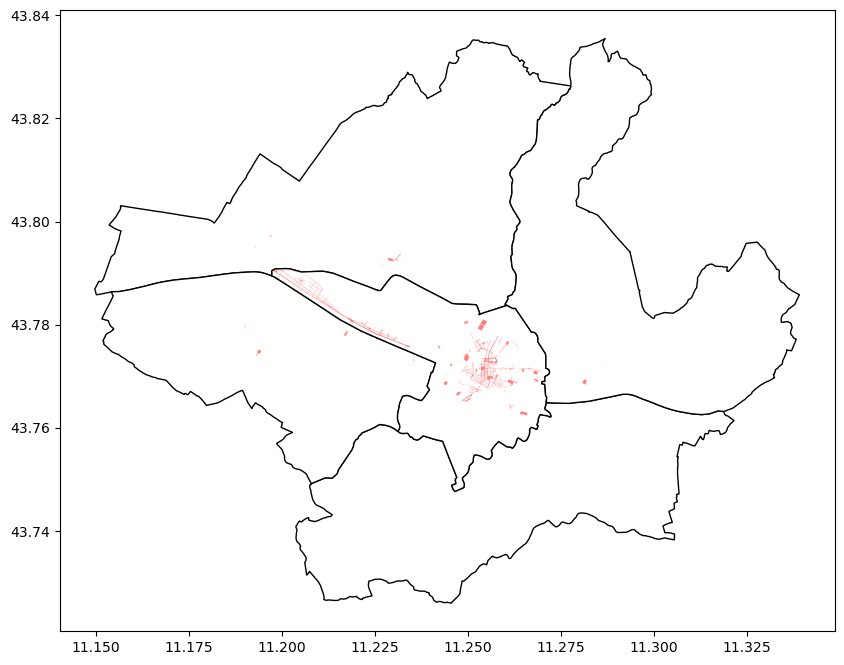

In [15]:
#plot pedestrian areas over quartieri
pedestrian_areas.plot(ax=quartieri.plot(figsize=(10, 10), color='white', edgecolor='black'), color='red', alpha=0.5)


In [ ]:
#take the intersection of pedestrian areas and quartieri
intersection = gpd.overlay(pedestrian_areas, quartieri, how='intersection')

